<a href="https://colab.research.google.com/github/Pooja-Agrahari340/credit-card-fraud-detection--Capstone-Project/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# credit-card-fraud-detection


# Problem Statement:

 “In today’s digital economy, credit card fraud is a growing issue for both financial institutions and consumers, with billions of dollars in losses each year. Fraud detection systems currently in use often fail to keep up with evolving fraudulent tactics, making it crucial to develop more effective, adaptive solutions. This project aims to develop a machine learning-based model that can automatically detect fraudulent credit card transactions using historical data. The model will be trained on a dataset that includes transaction time, amount, and user behavior, among other features. The primary goal is to identify fraudulent transactions with high precision, while minimizing false positives to ensure legitimate transactions are not impacted. The solution will not only help reduce financial losses but also enhance consumer trust in online payment systems.”

# Objective:


 The goal of this project is to build a machine learning-based credit card fraud detection model that can identify fraudulent transactions from legitimate ones in real-time, using historical transaction data. .

In [2]:
# Importing computational packages
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 100)

# Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing model building packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")

Exploratory data analysis (EDA)

In [3]:
#loading the dataset to a pandas dataframe
df=pd.read_csv("/content/drive/MyDrive/credit card folder/creditcard.csv")

In [4]:
# first 5 rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
# checking the number of missing values in each column
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [7]:
df.duplicated().sum()/len(df)

0.00379555277784605

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
# checking the datatypes and null/non-null distribution
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [10]:
# checking the shape
df.shape

(283726, 31)

In [11]:
# checking the distribution of numerical values in the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,0.000252,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,0.952215,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,-0.425732,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,0.492336,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


Checking the distribution of Classes

In [12]:
df['Class'].value_counts()

,count
Class,
0,283253
1,473


This dataset is highly unbalanced



*   0--> Normal transaction
*   1-->fraudulent



In [13]:
# separating the data for analysis
legit = df[df['Class'] == 0]
fraud = df[df['Class']  == 1]

In [14]:
print(legit.shape)
print(fraud.shape)

(283253, 31)
(473, 31)


Visualizing Graphically

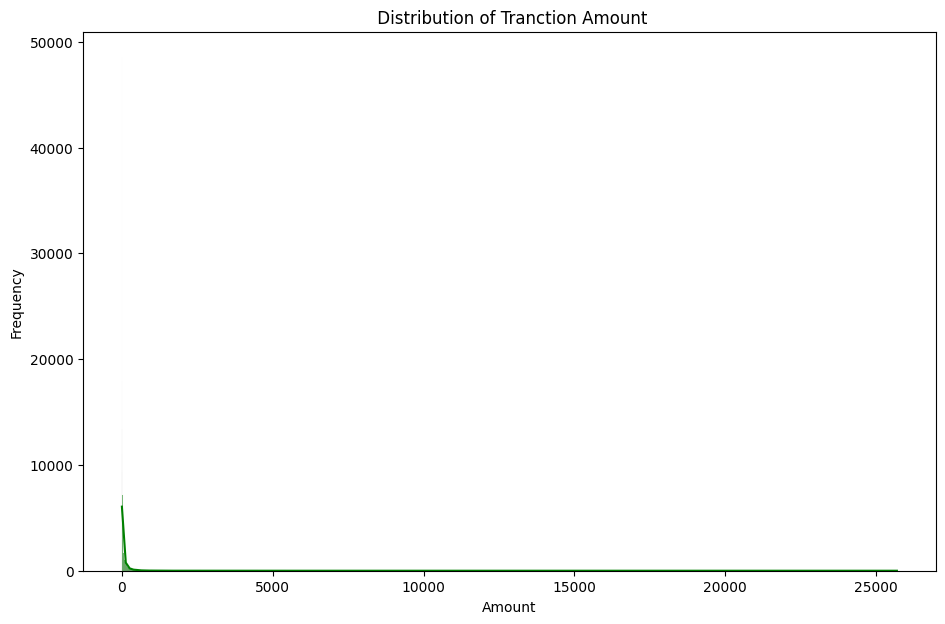

In [15]:
plt.figure(figsize=(11,7))
sns.histplot(df['Amount'],kde=True,color='green')
plt.title(' Distribution of Tranction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

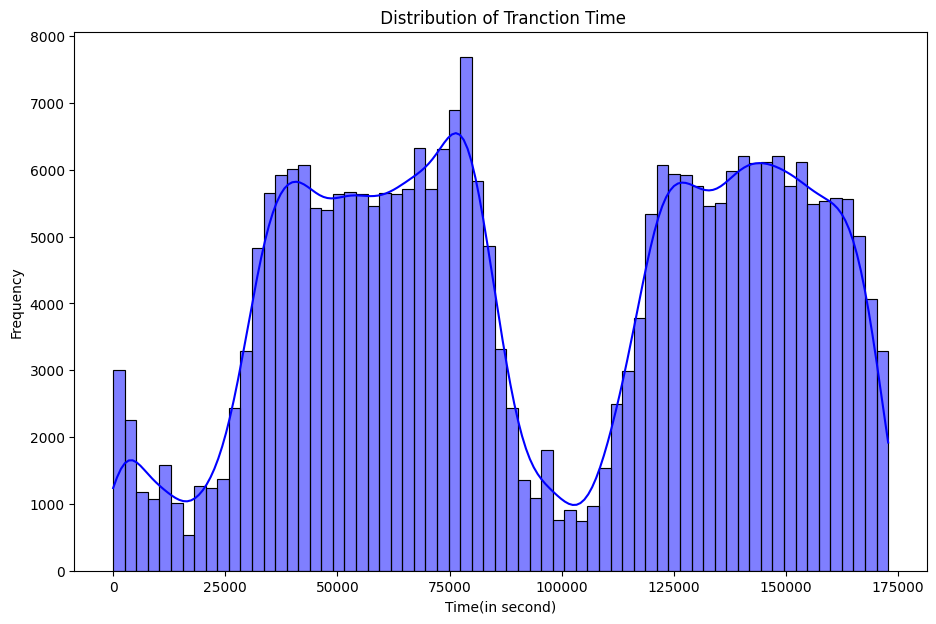

In [16]:
plt.figure(figsize=(11,7))
sns.histplot(df['Time'],kde=True,color='blue')
plt.title(' Distribution of Tranction Time')
plt.xlabel('Time(in second)')
plt.ylabel('Frequency')
plt.show()

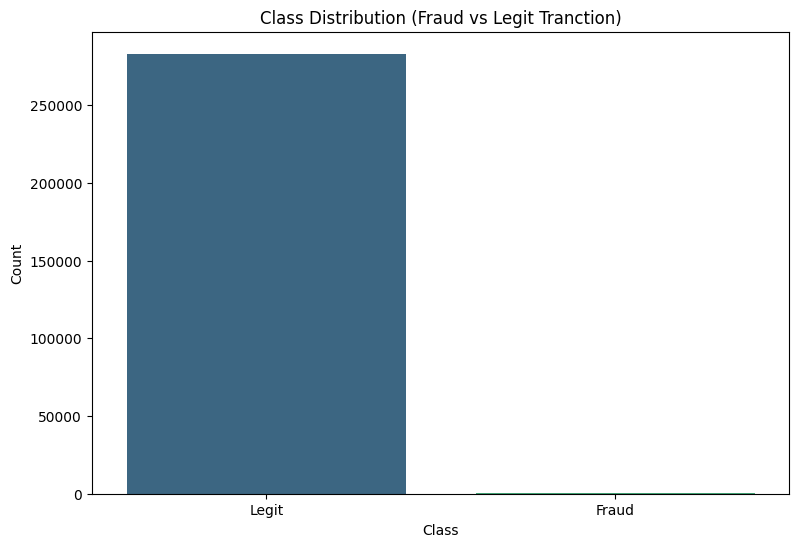

In [17]:
# visualizing the class distribution (fraud vs legit tranction)
plt.figure(figsize=(9, 6))
sns.countplot(x='Class',data=df,hue='Class',palette='viridis',legend=False)
plt.title('Class Distribution (Fraud vs Legit Tranction)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0,1],['Legit','Fraud'])
plt.show()

In [18]:
#percentage of fraud tranctions
Fraud_percentage = df['Class'].value_counts( normalize=True) * 100
print(f"Fraud percentage: \n{Fraud_percentage}")

Fraud percentage: 
Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64


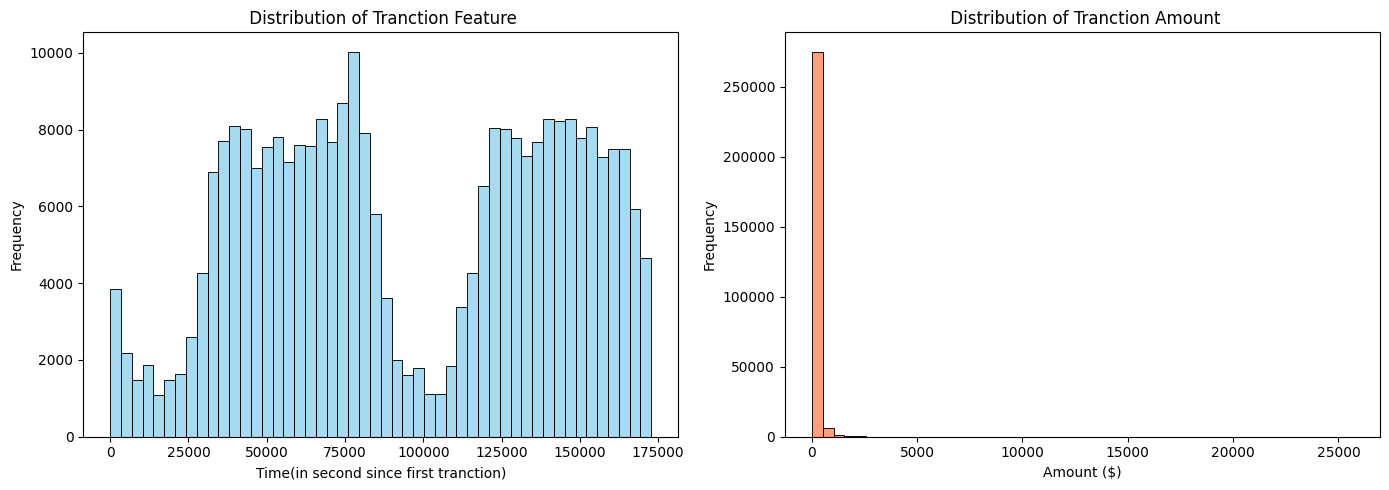

In [19]:
#plot the distribution of 'Time and 'Amount' features
fig, ax = plt.subplots(1, 2, figsize=(14,5))

# Time features distribution
sns.histplot(df['Time'], bins=50, color='skyblue',ax=ax[0])
ax[0].set_title(' Distribution of Tranction Feature')
ax[0].set_xlabel('Time(in second since first tranction)')
ax[0].set_ylabel('Frequency')

# Amount features distribution
sns.histplot(df['Amount'], bins=50, color='coral',ax=ax[1])
ax[1].set_title(' Distribution of Tranction Amount')
ax[1].set_xlabel('Amount ($)')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

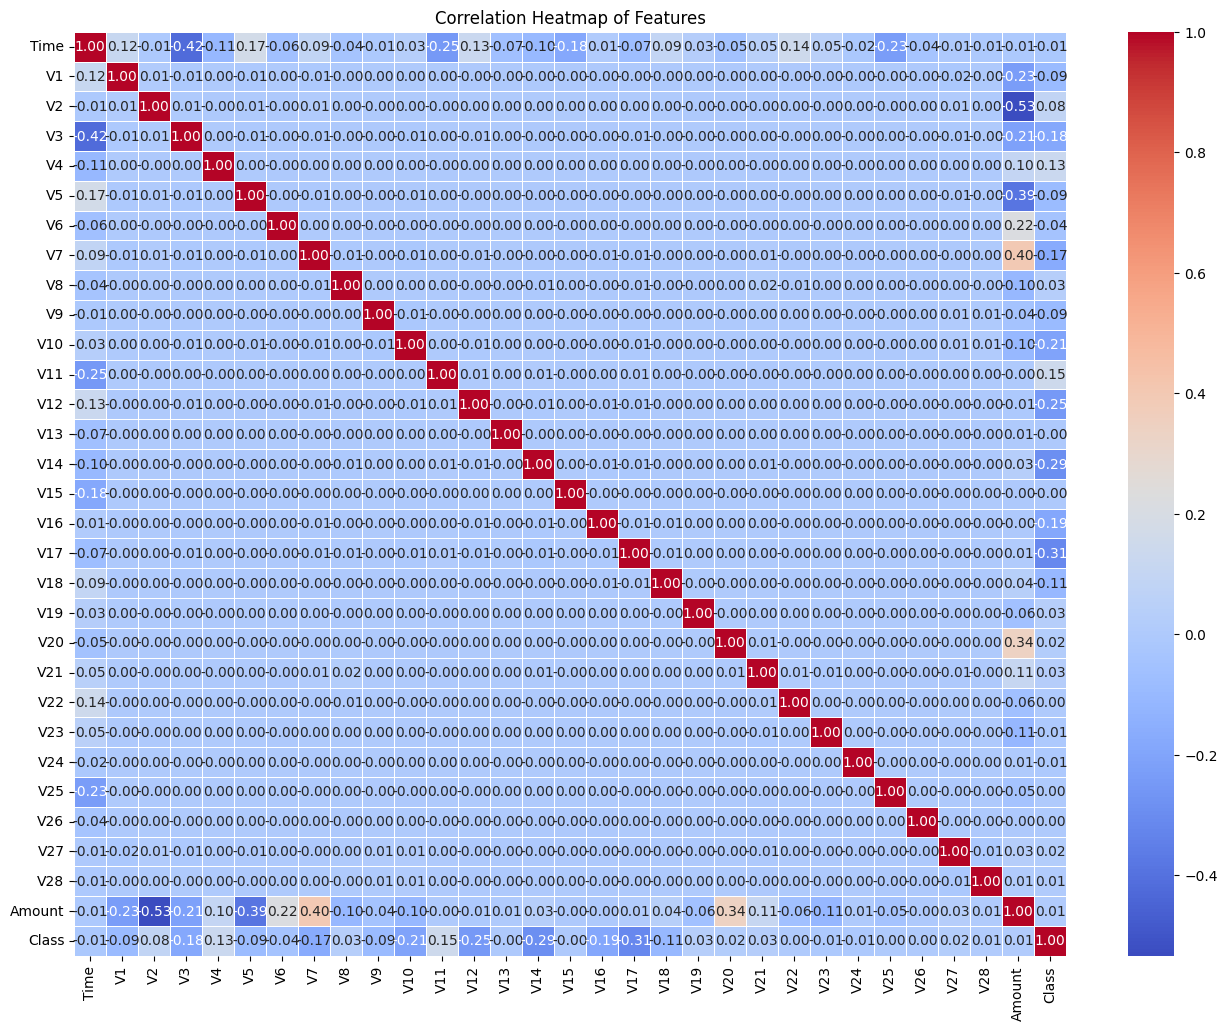

In [20]:
# Now, calculate the correlation matrix for the features in the dataset
correlation_matrix = df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

plt.title('Correlation Heatmap of Features')
plt.show()

Splitting the data into Features & Targets

In [21]:
X = df.drop(columns='Class', axis=1)
Y = df['Class']

In [22]:
print(X)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9       V10       V11       V12  \
0       0.462388  0.239599  0.098698  0.363787  0.09079

In [23]:
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64


Train-Test Split

In [24]:
# import library

from sklearn.model_selection import train_test_split

In [25]:
# putting all features in X
X = df.drop(['Class'], axis=1)

In [26]:
# assigning target variable to y
y = df['Class']

In [27]:
# validating the X
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [28]:
# validating the assignment
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, stratify=y, random_state=42)

Feature Scaling

We need to scale only the Amount column as all other columns are already scaled by the PCA transformation.

In [30]:
# importing the library for Standardization
from sklearn.preprocessing import StandardScaler

In [31]:
# Instantiate the Scaler
scaler = StandardScaler()

In [32]:
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [33]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
257334,158114.0,2.139297,-2.379957,-0.588094,-2.116887,-0.151810,4.930636,-3.133495,1.408309,0.431508,1.189920,-1.157223,-0.237411,0.252125,-1.698677,-1.543869,-0.888080,0.895687,0.094946,0.003088,-0.379746,-0.073778,0.629693,0.241327,0.738886,-0.314844,0.044060,0.139812,-0.034152,-0.308400
118498,75102.0,-2.150992,0.447565,0.584405,1.181052,0.180772,-1.200828,-0.106578,0.771604,-1.441208,-0.481802,1.244093,1.190524,0.212066,1.305198,0.207830,0.017997,0.076337,0.076609,0.944236,0.028937,-0.066225,-0.869480,-0.041398,0.501689,-0.198083,-0.732049,-0.234089,-0.221309,-0.363961
120679,75921.0,-6.000510,-5.868708,-1.210423,2.234168,-0.925608,0.019870,0.012067,0.910109,-0.905567,0.233812,-1.973658,-0.896498,-0.625239,0.811206,1.368011,-1.228141,0.642475,1.794655,-0.141484,0.545803,-0.132715,-0.755490,0.460192,-0.747164,-0.243348,-0.205593,0.915416,-1.136679,1.876398
163000,115559.0,2.021325,-0.535640,-0.416146,-0.124310,-0.178832,0.918878,-1.042599,0.318182,1.072180,0.119271,0.054577,1.062169,1.040246,-0.347979,0.151272,1.092741,-1.270309,0.711504,0.305460,-0.078728,0.020950,0.209552,0.220896,-0.311931,-0.459092,0.495448,-0.012725,-0.051766,-0.359922
171948,120888.0,0.149536,0.807852,-0.590906,-0.509802,1.145394,-1.116329,0.935687,-0.234237,0.014499,-1.110721,-1.212569,-0.652973,-0.290486,-0.829211,0.578890,0.439958,0.064027,0.898992,-0.346549,-0.122272,0.220651,0.679815,-0.349294,-0.734172,0.185243,-0.114120,0.027129,0.015322,-0.344877


Scaling the test set

In [34]:
# transform the test set

X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
139330,83104.0,-1.684059,1.500809,0.759888,0.550576,0.232439,-0.043998,0.626440,-0.004514,-0.004855,1.376058,1.540308,0.693117,0.019787,0.130297,0.672786,-0.542340,-0.259041,0.050345,0.296603,0.252636,0.099876,0.702279,-0.194992,0.034693,-0.271951,-0.402507,-0.359649,-0.093177,-0.283875
86361,61199.0,-0.712760,0.946364,1.613294,-0.057937,0.307252,0.033698,0.842808,-0.082649,-0.286508,-0.691974,-1.424615,0.187289,0.729575,-0.393678,-0.360989,-0.210956,-0.257742,-0.347665,0.783205,0.043267,-0.209533,-0.489587,-0.374907,-0.405319,0.492170,0.339188,-0.107684,0.052013,-0.234826
94117,64741.0,1.194627,0.202019,0.148443,0.456065,-0.024289,-0.105957,-0.146632,0.140367,-0.109165,-0.137806,1.448209,0.552174,-0.475780,0.047778,0.741160,0.508925,-0.059739,-0.065391,-0.138696,-0.134548,-0.237956,-0.716717,0.114452,-0.366347,0.135195,0.129319,-0.014949,0.012339,-0.360375
123803,77071.0,1.191219,-0.686249,0.413138,0.261424,-0.634744,0.624022,-0.717510,0.123673,-0.737618,0.811951,-0.149693,0.699783,1.113520,-0.260753,-0.373348,-0.937595,-0.774998,2.225077,-0.413753,-0.297845,-0.214390,-0.138765,-0.283669,-0.835391,0.646958,-0.177545,0.063255,0.026668,-0.019874
126884,78136.0,0.807040,-1.845157,1.160044,-0.078988,-1.973917,0.492741,-1.211037,0.286344,0.606206,0.173870,-0.962828,-0.534526,-0.857532,-0.955275,-0.739601,0.405838,1.157364,-1.717754,0.532613,0.443070,0.253705,0.462592,-0.229476,0.129784,0.251871,-0.111874,0.038918,0.063682,0.666405


Logistic Regression

In [35]:
model = LogisticRegression()

In [36]:
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)


#perform cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True)
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9385624339933546
Best hyperparameters:  {'C': 0.1}


In [37]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.246382,0.866329,0.034168,0.003240,0.01,{'C': 0.01},0.946757,0.945566,0.952675,0.936141,0.909323,0.938092,0.015330,3,0.928629,0.948231,0.924509,0.954625,0.932112,0.937621,0.011703
1,4.544121,0.600645,0.035777,0.008834,0.10,{'C': 0.1},0.944581,0.919670,0.958362,0.936653,0.933546,0.938562,0.012759,1,0.925661,0.930363,0.925947,0.956584,0.952950,0.938301,0.013596
2,3.722226,0.571226,0.039719,0.013439,1.00,{'C': 1},0.966251,0.949793,0.960221,0.915387,0.899015,0.938133,0.026314,2,0.947643,0.949930,0.930418,0.933109,0.922990,0.936818,0.010344
3,3.916514,0.575669,0.042581,0.017543,10.00,{'C': 10},0.947418,0.947741,0.950352,0.929681,0.902722,0.935583,0.018004,5,0.926223,0.949466,0.918868,0.950153,0.927435,0.934429,0.012898
4,4.454909,0.939348,0.043097,0.015044,100.00,{'C': 100},0.933270,0.933973,0.955791,0.915470,0.932560,0.934213,0.012811,6,0.919735,0.938069,0.921439,0.933396,0.951457,0.932819,0.011627
5,3.634074,0.299448,0.028589,0.003542,1000.00,{'C': 1000},0.962232,0.923452,0.949070,0.915402,0.932311,0.936493,0.017047,4,0.946254,0.932853,0.918099,0.933081,0.949224,0.935902,0.011125


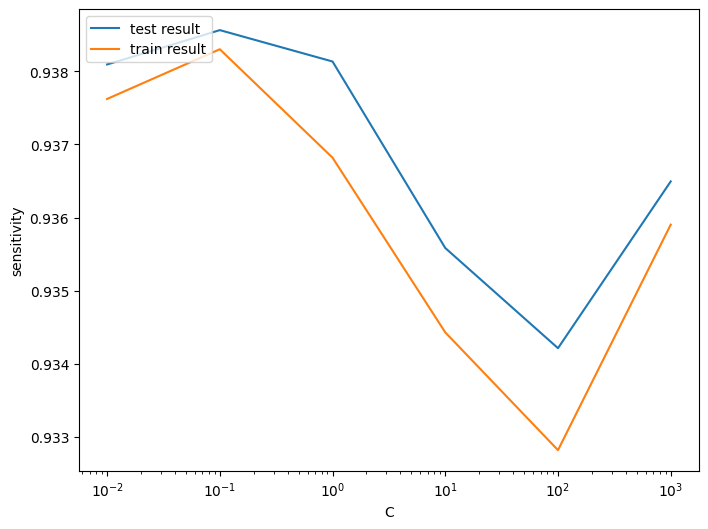

In [38]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

Logistic Regression with optimal C


In [39]:
# Instantiating the model with best C
log_reg_imb_model = LogisticRegression(C=0.01)

# Fitting the model on train dataset
log_reg_imb_model.fit(X_train, y_train)

LogisticRegression(C=0.01)

Prediction and model evalution on the train set

In [40]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%")
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [41]:
# Predictions on the train set
y_train_pred = log_reg_imb_model.predict(X_train)

In [42]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [43]:
# Predicted probability
y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]

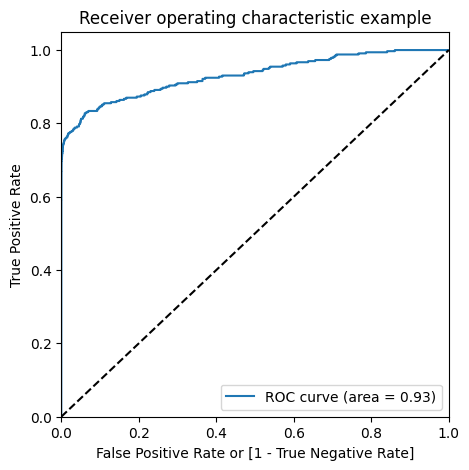

In [44]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

Evaluating the model on the test set


In [45]:
from sklearn.metrics import f1_score, classification_report

In [46]:
# Making prediction on the test set
y_test_pred = log_reg_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 67.63%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.69      0.66      0.68       142

    accuracy                           1.00     85118
   macro avg       0.85      0.83      0.84     85118
weighted avg       1.00      1.00      1.00     85118



In [47]:
# Predicted probability
y_test_pred_proba = log_reg_imb_model.predict_proba(X_test)[:,1]

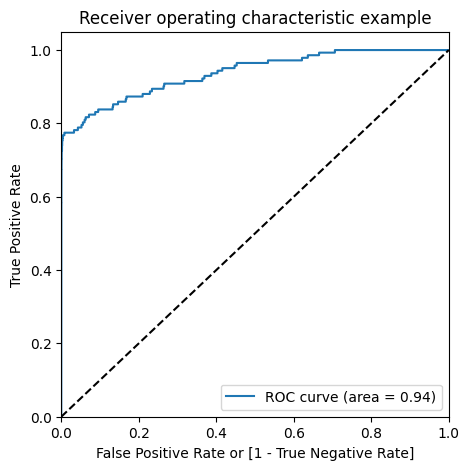

In [48]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Decision Tree


In [49]:
dtree = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [50]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [51]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(40, 140, 40),
    'min_samples_split': range(40, 140, 40),
}

In [52]:
# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           n_jobs=-1,
                           verbose = 1)

In [53]:
# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(40, 140, 40),
                         'min_samples_split': range(40, 140, 40)},
             scoring='roc_auc', verbose=1)

In [54]:
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.938696273576043
DecisionTreeClassifier(max_depth=5, min_samples_leaf=120, min_samples_split=40)


Decision Tree with optimal hyperparameters


In [55]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

Prediction on the train set

In [56]:
y_train_pred = dt_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 71.99%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    198277
           1       0.75      0.69      0.72       331

    accuracy                           1.00    198608
   macro avg       0.87      0.85      0.86    198608
weighted avg       1.00      1.00      1.00    198608



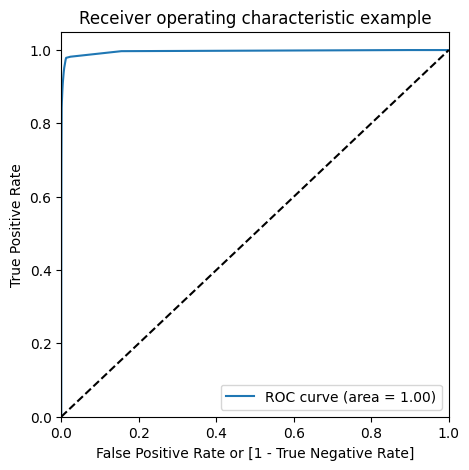

In [57]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

Evaluating the model on the test set

In [58]:
y_test_pred = dt_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 70.41%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.75      0.66      0.70       142

    accuracy                           1.00     85118
   macro avg       0.88      0.83      0.85     85118
weighted avg       1.00      1.00      1.00     85118



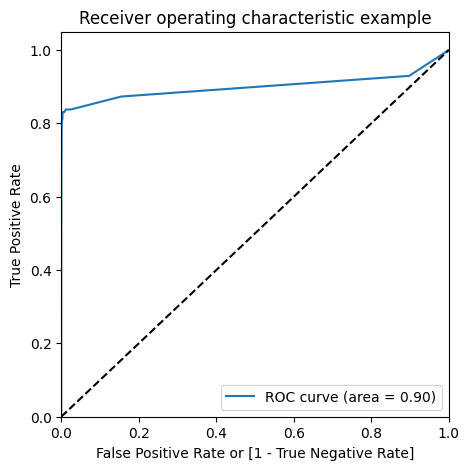

In [59]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Model Summary

Train set



*   ROC Score: 99%
*   F1 score : 72.33%



Test set





*   ROC Score: 96%
*   F1 score : 71.88%



Random forest


In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
# Create a based model
rf = RandomForestClassifier()

In [63]:
param_grid = {
    'n_estimators': [10,50],
    'max_depth': [3,5]
}

In [64]:
# Create the RandomForestClassifier model
rf = RandomForestClassifier(random_state=42)

In [65]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=2,
                           verbose=1,
                           return_train_score=True)

In [66]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=2,
             param_grid={'max_depth': [3, 5], 'n_estimators': [10, 50]},
             return_train_score=True, verbose=1)

In [67]:
# Output the best parameters and best cross-validation score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters found:  {'max_depth': 5, 'n_estimators': 50}
Best cross-validation score: 1.00


In [68]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                                        max_depth = 5,
                                        n_estimators = 50)

In [69]:
# Fit the model
rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50)

Prediction on the train set

In [70]:
y_train_pred = rfc_imb_model.predict(X_train)

In [71]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[198266     11]
 [    79    252]]


In [72]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [73]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9995468460484975
Sensitivity:- 0.7613293051359517
Specificity:- 0.9999445220575256
F1-Score:- 0.8484848484848485


In [74]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198277
           1       0.96      0.76      0.85       331

    accuracy                           1.00    198608
   macro avg       0.98      0.88      0.92    198608
weighted avg       1.00      1.00      1.00    198608



SMOTE (Synthetic Minority Oversampling Technique)

In [75]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [76]:
sm = SMOTE(random_state=27)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [77]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (198608, 30)
After SMOTE oversampling X_train shape= (396554, 30)


In [78]:
import joblib

In [80]:
joblib.dump(model, 'credit_card_model.pkl')

['credit_card_model.pkl']

Load the Model

In [82]:
loaded_model = joblib.load('credit_card_model.pkl')

Conclusion

 This project successfully demonstrates the power of machine learning algorithms in fraud detection. While the model performs well with the current data and features, future improvements and optimizations can further enhance its robustness and predictive power, making it a valuable tool for detecting and preventing fraudulent transactions in real-world scenarios.